In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

In [ ]:
train_x = train_images.reshape((train_images.shape[0], 28, 28, 1))
train_x = train_x.astype('float32')/255
test_x = test_images.reshape((test_images.shape[0], 28, 28, 1))
test_x = test_x.astype('float32')/255

train_y = tf.keras.utils.to_categorical(train_labels)
test_y = tf.keras.utils.to_categorical(test_labels)
print(train_y[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation=tf.nn.relu, input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_x, train_y, epochs=10, batch_size=512,validation_data=(test_x,test_y))
model.save("mnist.h5")

Epoch 1/10
118/118 [==============================] - 55s 444ms/step - loss: 0.5380 - accuracy: 0.8437 - val_loss: 0.1259 - val_accuracy: 0.9620
Epoch 2/10
118/118 [==============================] - 48s 409ms/step - loss: 0.1112 - accuracy: 0.9664 - val_loss: 0.0651 - val_accuracy: 0.9791
Epoch 3/10
118/118 [==============================] - 51s 431ms/step - loss: 0.0721 - accuracy: 0.9785 - val_loss: 0.0485 - val_accuracy: 0.9847
Epoch 4/10
118/118 [==============================] - 48s 408ms/step - loss: 0.0559 - accuracy: 0.9832 - val_loss: 0.0457 - val_accuracy: 0.9840
Epoch 5/10
118/118 [==============================] - 50s 422ms/step - loss: 0.0470 - accuracy: 0.9860 - val_loss: 0.0416 - val_accuracy: 0.9862
Epoch 6/10
118/118 [==============================] - 50s 426ms/step - loss: 0.0418 - accuracy: 0.9873 - val_loss: 0.0344 - val_accuracy: 0.9886
Epoch 7/10
118/118 [==============================] - 50s 421ms/step - loss: 0.0374 - accuracy: 0.9882 - val_loss: 0.0324 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# dataset = train_x
# def representative_data_gen():
#     for image in dataset[0:100,:,:]:
#         yield[image.reshape(-1,train_images.shape[1],train_images.shape[2],1).astype("float32")]

# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
# converter.representative_dataset = representative_data_gen
# converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]

# converter.inference_input_type = tf.int8
# converter.inference_output_type = tf.int8
# tflite_model = converter.convert()
# open("mnist.tflite", "wb").write(tflite_model)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
flatbuffer_size = open("mnist.tflite", "wb").write(tflite_model)

print('The size of the converted flatbuffer is: %d bytes' % flatbuffer_size)


The size of the converted flatbuffer is: 377312 bytes


In [ ]:
!apt-get -qq install xxd
!xxd -i mnist.tflite > mnist.cc


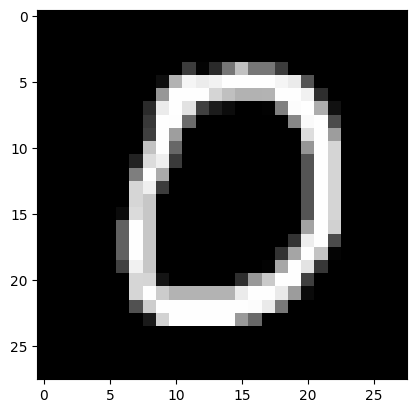

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 42ms/step
0
(784,)
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.23921569,0.011764706,0.16470589,0.4627451,0.75686276,0.4627451,0.4627451,0.23921569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05490196,0.7019608,0.9607843,0.9254902,0.9490196,0.99607843,0.99607843,0.99607843,0.99607843,0.9607843,0.92156863,0.32941177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5921569,0.99607843,0.99607843,0.99607843,0.8352941,0.7529412,0.6

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
test = test_x[10]

fig = plt.figure
plt.imshow(test, cmap='gray')
plt.show()

print(test_y[10])
test = test.reshape(-1,28,28,1)
print(np.argmax(model.predict(test)))


test_1 = test.reshape(28,28)
array = test_1.flatten()
print(array.shape)
result_string = ",".join(map(str, array))
print(result_string)
